In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize the images to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
# Flatten the images from 28x28 to 784-dimensional vectors
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [ ]:
# Define the model
def create_model(activation_function):
  model = models.Sequential()
# First hidden layer with the specified activation function
  model.add(layers.Dense(128, activation=activation_function, input_shape=(784,)))
# Second hidden layer with the same activation function
  model.add(layers.Dense(128, activation=activation_function))
# Output layer (softmax for classification)
  model.add(layers.Dense(10, activation='softmax')) # 10 classes for MNIST
  model.compile(optimizer='adam',

  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

  return model

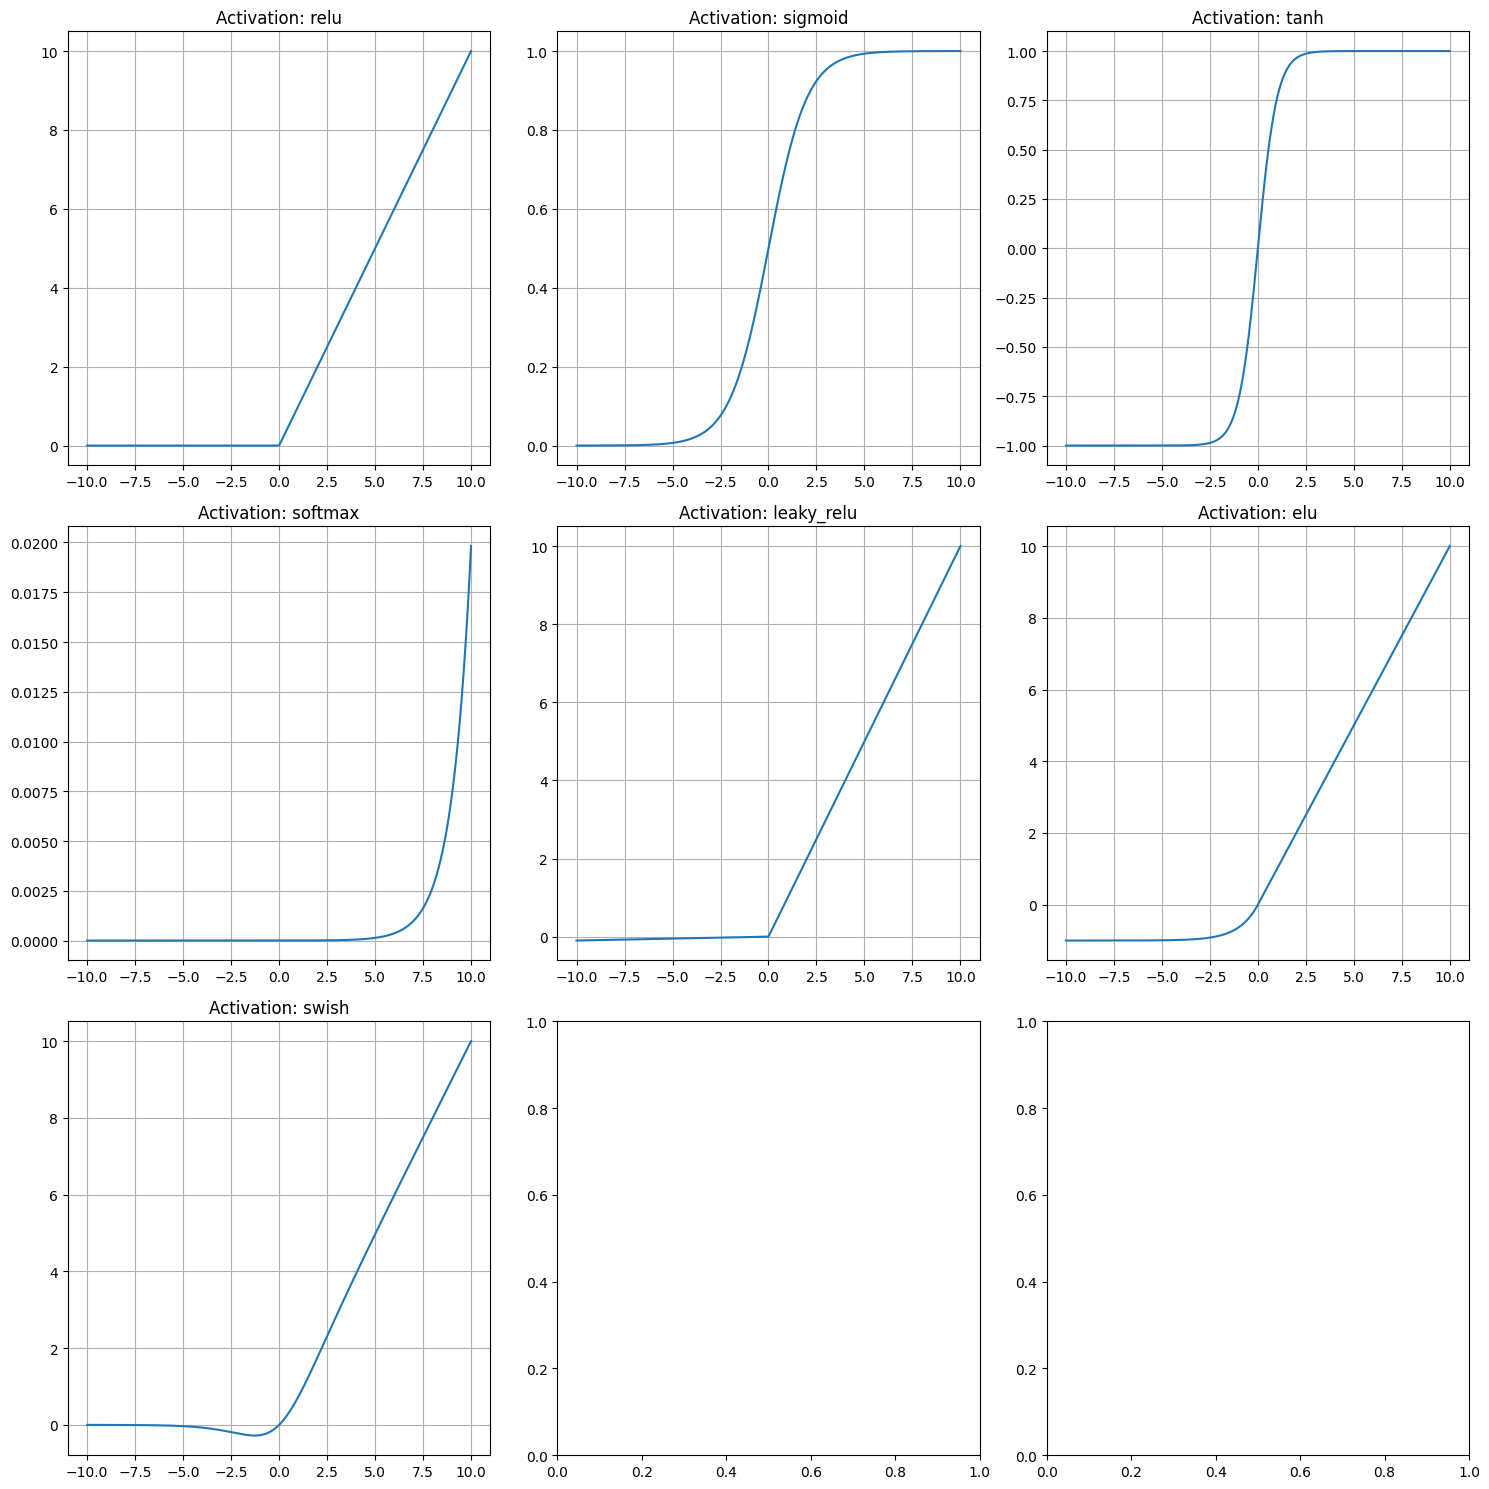

In [ ]:
# Activation functions to demonstrate
activation_functions = ['relu', 'sigmoid', 'tanh', 'softmax', 'leaky_relu', 'elu', 'swish']
# Create a subplot to visualize the activation functions
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Plot and demonstrate each activation function
for idx, activation in enumerate(activation_functions):
  ax = axes[idx]
# Generate an input range from -10 to 10 for plotting
  x = np.linspace(-10, 10, 1000)
  if activation == 'relu':
    y = np.maximum(0, x) # ReLU function
  elif activation == 'sigmoid':
    y = 1 / (1 + np.exp(-x)) # Sigmoid function
  elif activation == 'tanh':
    y = np.tanh(x) # Tanh function
  elif activation == 'softmax':
# Softmax is not typically used in isolation for a single input, so we simulate i
    y = np.exp(x) / np.sum(np.exp(x)) # Softmax function (simplified)
  elif activation == 'leaky_relu':
    y = np.where(x > 0, x, 0.01 * x) # Leaky ReLU function
  elif activation == 'elu':
    y = np.where(x > 0, x, np.exp(x) - 1) # ELU function
  elif activation == 'swish':
    y = x * (1 / (1 + np.exp(-x))) # Swish function
# Plot the activation function
  ax.plot(x, y)
  ax.set_title(f"Activation: {activation}")
  ax.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Train and evaluate the model for each activation function
results = {}
for activation in activation_functions:
  print(f"\nTraining model with {activation} activation function...")
  model = create_model(activation_function=activation)
# Train the model (we will train for a few epochs for demonstration purposes)
  model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))
# Evaluate the model on the test data
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
  results[activation] = test_acc
  print(f"{activation} test accuracy: {test_acc:.4f}")
# Print the results
print("\nTest accuracy for each activation function:")
for activation, accuracy in results.items():
  print(f"{activation}: {accuracy:.4f}")


Training model with relu activation function...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8648 - loss: 0.4743 - val_accuracy: 0.9593 - val_loss: 0.1349
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9664 - loss: 0.1142 - val_accuracy: 0.9714 - val_loss: 0.0975
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9781 - loss: 0.0715 - val_accuracy: 0.9738 - val_loss: 0.0850
relu test accuracy: 0.9738

Training model with sigmoid activation function...
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7369 - loss: 1.0226 - val_accuracy: 0.9275 - val_loss: 0.2473
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9354 - loss: 0.2235 - val_accuracy: 0.9485 - val_loss: 0.1734
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9540 - loss: 0.1578 - val_accuracy: 0.9585 - val_loss: 0.1352
sigmoid test accuracy: 0.9585

Training model with tanh activation function...
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8652 - loss: 0.